In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
from datetime import datetime
import yfinance as yf
yf.pdr_override()
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
tickers = ['SBUX', 'MCD','VITL', 'YUM','PEP','KO','CPB','NSRGY','AVAV','KTOS']

start = '2021-01-01'
end = '2024-01-01'

data = yf.download(tickers,start=start, end=end, interval='1d')['Close']

print(data.head())

# SBUX represents the largest chain of food manufacturing company where mainly sells coffee
# MCD Mc'Donalds's is known for McDonald's Corporation is an American multinational fast food chain restaurant
# VITL is the ticker for VITAL Farms which is also a food manufacturing company
# YUM Yum! Brands, Inc., formerly Tricon Global Restaurants, Inc., is an American multinational fast food corporation
# PEP represents the drink manufacturing company pepsi
# KO  The Coca-Cola Company is an American multinational corporation
#CPB The Campbell Soup Company, doing business as Campbell's, is an American company, most closely associated with its flagship canned soup products
#NSRGY Nestle is  a multinational compnay, it processes the fast food

[*********************100%%**********************]  10 of 10 completed


Ticker           AVAV        CPB         KO       KTOS         MCD  \
Date                                                                 
2021-01-04  85.930000  48.529999  52.759998  26.370001  210.220001   
2021-01-05  88.449997  48.900002  52.180000  26.910000  211.479996   
2021-01-06  89.470001  47.910000  50.520000  26.690001  211.000000   
2021-01-07  90.910004  47.220001  49.959999  26.950001  211.979996   
2021-01-08  92.690002  46.860001  51.080002  26.570000  215.869995   

Ticker           NSRGY         PEP        SBUX       VITL         YUM  
Date                                                                   
2021-01-04  118.610001  144.270004  103.099998  25.059999  105.820000  
2021-01-05  118.139999  144.699997  103.440002  25.629999  105.830002  
2021-01-06  115.680000  142.929993  104.190002  26.549999  106.410004  
2021-01-07  115.290001  142.470001  103.349998  27.530001  105.599998  
2021-01-08  114.839996  144.179993  105.669998  27.160000  107.150002  


In [ ]:
data.describe()

Ticker,AVAV,CPB,KO,KTOS,MCD,NSRGY,PEP,SBUX,VITL,YUM
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,95.810491,46.906946,58.537742,18.009163,255.739814,120.379655,166.428712,100.179070,15.759861,123.017596
std,16.988029,4.416912,4.118680,5.868792,22.634714,7.477633,14.577268,12.077726,4.640680,8.991072
min,53.779999,38.060001,48.150002,9.060000,204.839996,104.320000,128.830002,69.900002,8.170000,101.489998
25%,85.790001,43.200001,55.480000,13.350000,238.440002,114.800003,156.949997,92.220001,12.220000,117.150002
50%,94.160004,46.250000,59.430000,16.750000,254.490005,120.180000,168.860001,101.379997,14.900000,124.080002
75%,107.190002,50.009998,61.849998,22.459999,271.410004,125.970001,176.729996,110.459999,17.799999,129.539993
max,141.229996,57.549999,66.209999,33.240002,298.410004,141.119995,196.119995,126.059998,29.870001,142.899994


[*********************100%%**********************]  10 of 10 completed


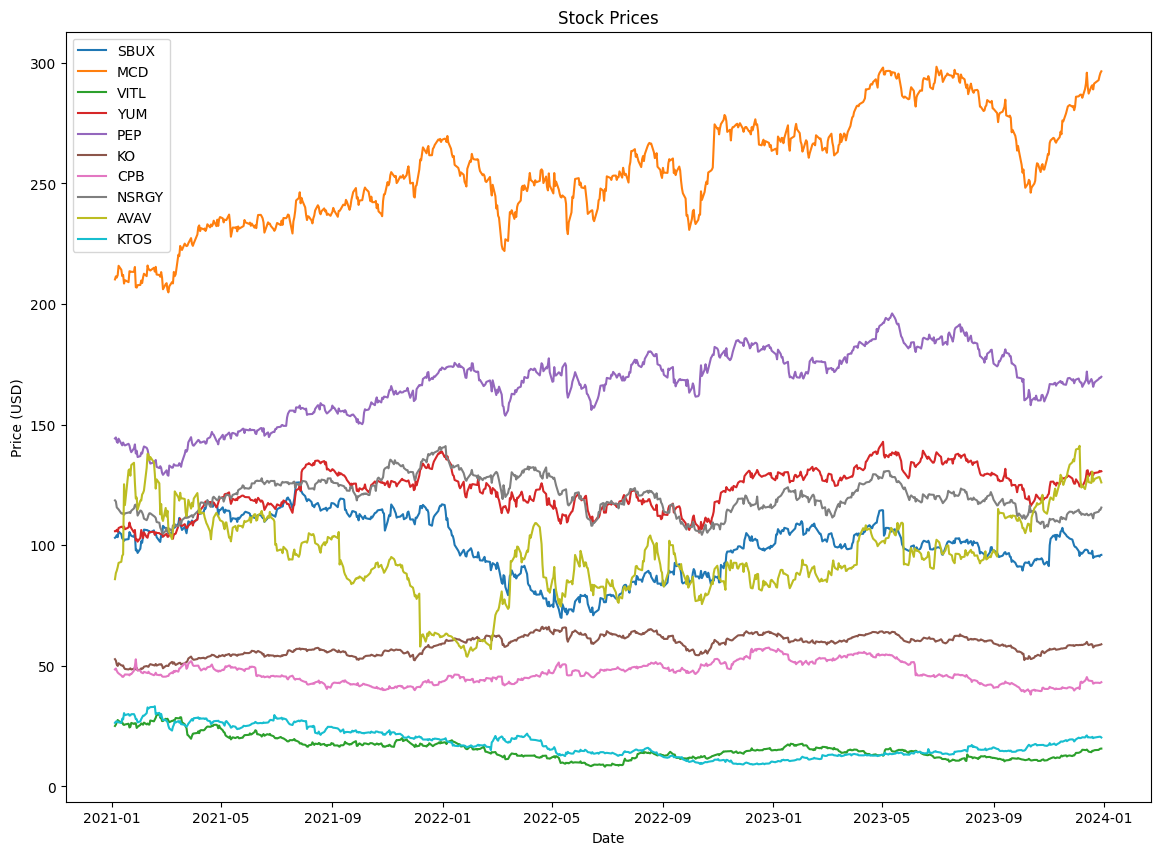

In [ ]:
data = yf.download(tickers, start=start, end=end)

closing_prices = data['Close']
plt.figure(figsize=(14, 10))

for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)

plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# This graph shows all food industries shares soaring from early 2021 to the end of 2024
# It may mean that people's demand has decreased during the war period
# Since then, it shows that all shares fall again from the march of 2022
# Through stock price analysis of each company, we would like to suggest the direction of the food industry sector in the future

In [ ]:
tickers = ['SBUX', 'MCD', 'YUM','PEP','KO','NSRGY','CPB','AVAV','KTOS']
start = '2021-01-01'
end = '2024-03-24'
data = yf.download(tickers + ['^GSPC'], start=start, end=end)

closing_prices = data['Close']
returns = closing_prices.pct_change()
risk_free_rate = 0
market_return = returns['^GSPC'].mean() * 252

# To obtain CAPM results, GSPC shares representing the s&p 500 were used
# So I added S&P 500 shares to the original data to create new data, and the risk free rate was set to zero

[*********************100%%**********************]  10 of 10 completed


In [ ]:
betas = {}
for ticker in tickers:
    covariance = returns[ticker].cov(returns['^GSPC'])
    market_variance = returns['^GSPC'].var()
    beta = covariance / market_variance
    betas[ticker] = beta

expected_returns = {}
for ticker in tickers:
    expected_return = risk_free_rate + betas[ticker] * (market_return - risk_free_rate)
    expected_returns[ticker] = expected_return * 100


results_df = pd.DataFrame({
    'Beta': betas,
    'Expected Return (%)': expected_returns
})


print("------ CAPM Results ------")
print(results_df)

# Beta measures the sensitivity of a stock's returns to the overall market returns
# It represents the stock's systematic risk
# A beta greater than 1.0 indicates the stock is more volatile than the market (higher risk and potential reward)
# # SBUX seems to be have higher risk and potential reward at the same time
# The expected return of a stock is the return that an investor anticipates earning on that stock
# expected return takes into account various factors, including risk and potential reward
# it seems that SBUX,YUM,MCD has high expected returns

------ CAPM Results ------
           Beta  Expected Return (%)
SBUX   1.017123            12.494797
MCD    0.515751             6.335714
YUM    0.670159             8.232537
PEP    0.457456             5.619595
KO     0.460911             5.662039
NSRGY  0.408008             5.012158
CPB    0.155877             1.914863
AVAV   1.032551            12.684322
KTOS   1.207451            14.832874


[*********************100%%**********************]  9 of 9 completed


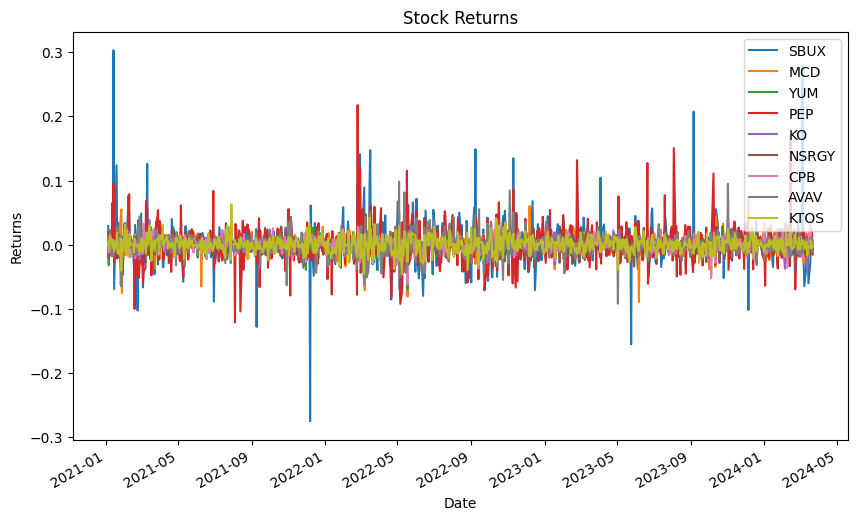

In [ ]:
tickers = ['SBUX', 'MCD', 'YUM','PEP','KO','NSRGY','CPB','AVAV','KTOS']
start = '2021-01-01'
end = '2024-03-24'

data = yf.download(tickers, start=start, end=end)


closing_prices = data['Close']
returns = closing_prices.pct_change()

returns.plot(figsize=(10, 6))
plt.title('Stock Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(tickers)
plt.show()

In [ ]:
import yfinance as yf

# Define the list of tickers
ann_tickers = ['SBUX', 'MCD', 'YUM', 'PEP', 'KO', 'NSRGY', 'CPB','AVAV','KTOS']

# Define the start and end dates for the period
start_date = '2021-01-01'
end_date = '2024-01-01'

# Downloading stock price data from Yahoo Finance
data = yf.download(ann_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for the closing prices
returns = data.pct_change()

# Calculate annualized returns
annualized_returns = returns.mean() * 252

print(annualized_returns)


[*********************100%%**********************]  9 of 9 completed


Ticker
AVAV     0.266343
CPB      0.018539
KO       0.080782
KTOS     0.020634
MCD      0.151377
NSRGY    0.031394
PEP      0.096283
SBUX     0.034503
YUM      0.108306
dtype: float64


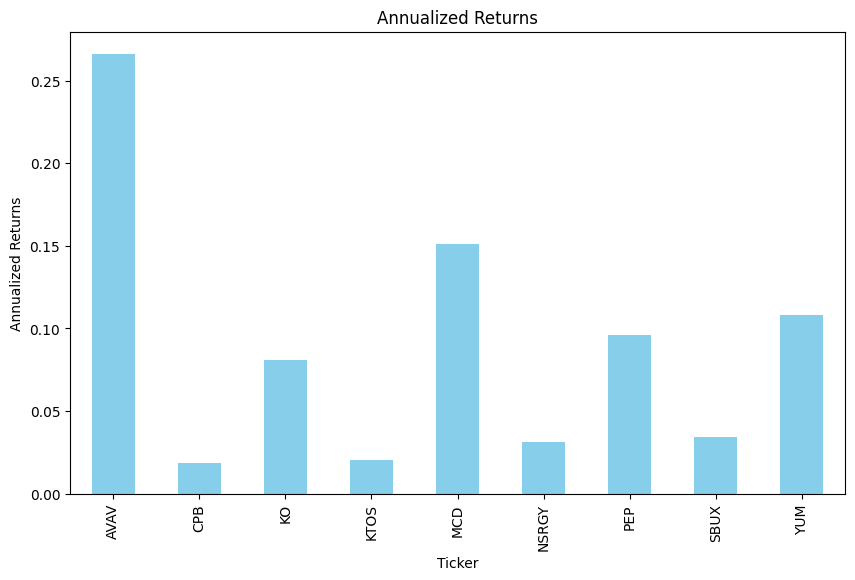

In [ ]:
annualized_returns.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Annualized Returns')
plt.xlabel('Ticker')
plt.ylabel('Annualized Returns')
plt.show()
# It seems MCD has highest annualized returns here
# This level of return can be attractive to investors as it suggests the potential for substantial growth in the value of the investment
# But high returns often come with higher levels of risk
# CPB has the lowest annualized return
# Lower but steady returns like this are often associated with more conservative and stable investments

In [ ]:
import yfinance as yf

# Define the list of tickers
ann_tickers = ['SBUX', 'MCD', 'YUM', 'PEP', 'KO', 'NSRGY', 'CPB','AVAV','KTOS']

# Define the start and end dates for the period
start_date = '2021-01-01'
end_date = '2024-01-01'

# Downloading stock price data from Yahoo Finance
data = yf.download(ann_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for the closing prices
returns = data.pct_change()

# Calculate the standard deviation of daily returns (which represents risk)
risk = returns.std()

print(risk)


[*********************100%%**********************]  9 of 9 completed

Ticker
AVAV     0.033240
CPB      0.014190
KO       0.010194
KTOS     0.029572
MCD      0.010389
NSRGY    0.010910
PEP      0.010382
SBUX     0.017415
YUM      0.012427
dtype: float64


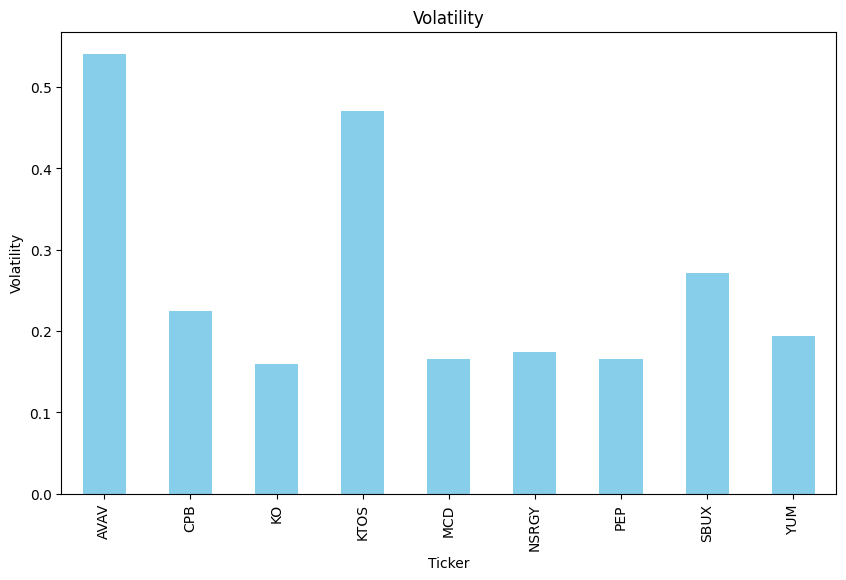

In [ ]:
returns = closing_prices.pct_change()
volatility = returns.std() * (252 ** 0.5)

volatility.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Volatility')
plt.xlabel('Ticker')
plt.ylabel('Volatility')
plt.show()

# Volatility is often used as a measure of risk, and higher volatility generally indicates greater uncertainty and potential for larger price swings
# in this graph SBUX is 0.29 so it suggests that the asset experienced moderate to relatively high fluctuations in its price or returns over the specified period
# Assets with higher volatility may offer the potential for greater returns, but they also come with higher risk and potential for significant losses.


In [ ]:
risk_free_rate = 0.01
sharpe_ratio = (annualized_returns - risk_free_rate) / volatility
print(sharpe_ratio)

# Sharpe ratio is a measure that helps evaluate the risk-adjusted return of an investment or portfolio
# A higher Sharpe ratio generally indicates a more attractive risk-adjusted return

Ticker
AVAV     0.473594
CPB      0.037952
KO       0.443112
KTOS     0.022564
MCD      0.852353
NSRGY    0.123180
PEP      0.523011
SBUX     0.090437
YUM      0.506934
dtype: float64


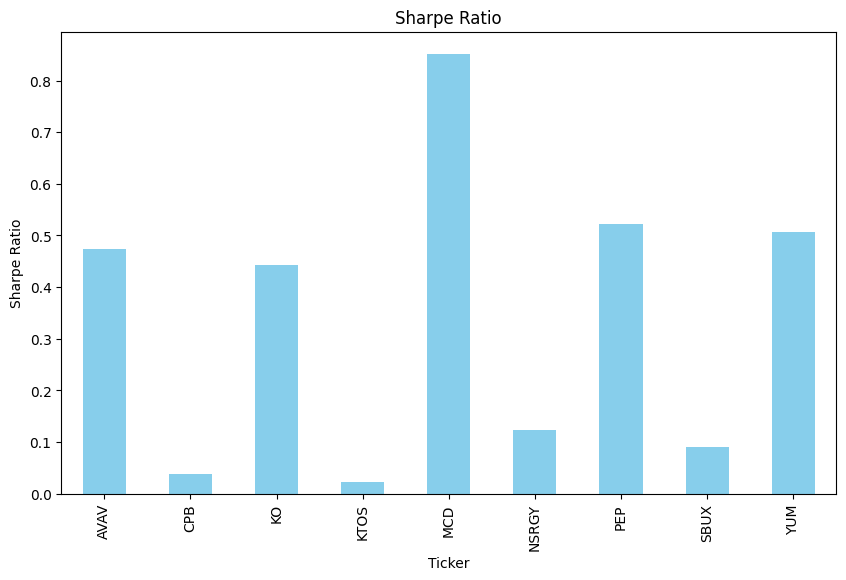

In [ ]:
sharpe_ratio.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Sharpe Ratio')
plt.xlabel('Ticker')
plt.ylabel('Sharpe Ratio')
plt.show()
# MCD sharpe ratio is 0.852352 it indicats that investment or portfolio generated an average return that is 0.852352 times its volatility, after adjusting for the risk-free rate
# CPB has A Sharpe ratio of 0.037952 indicates that the investment or portfolio generated an average return that is 0.037952 times its volatility, after adjusting for the risk-free rate

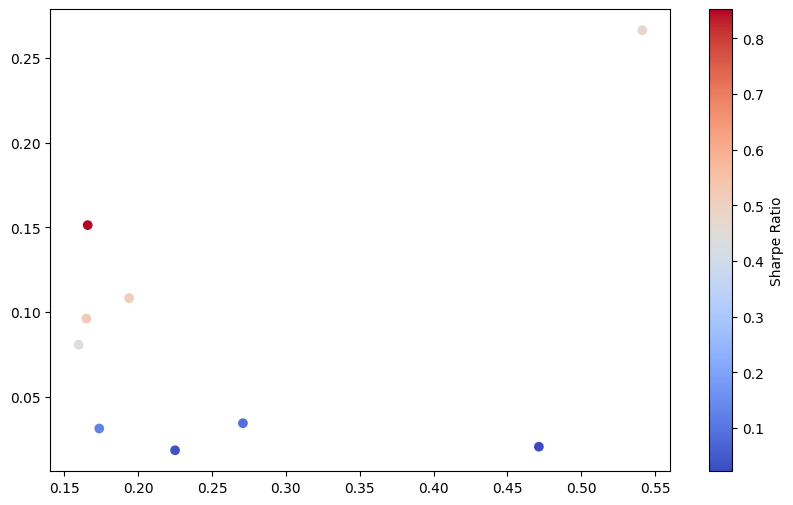

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.scatter(volatility, annualized_returns, c=sharpe_ratio, cmap='coolwarm')
fig.colorbar(im, ax=ax, label='Sharpe Ratio')


[*********************100%%**********************]  1 of 1 completed


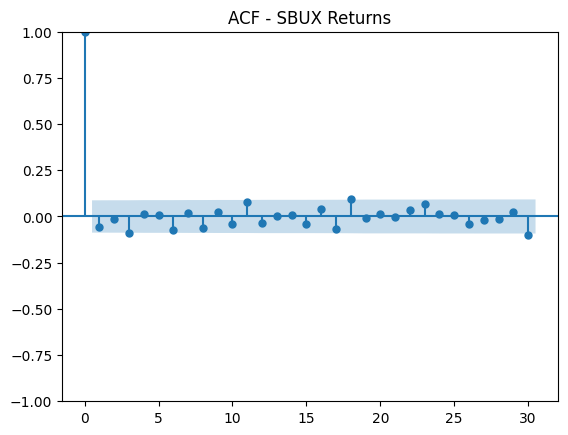

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


ticker = 'SBUX'
start_date = '2021-01-01'
end_date = '2023-01-01'
data = yf.download(ticker, start=start_date, end=end_date)


closing_prices = data['Close']
returns = closing_prices.pct_change().dropna()

plot_acf(returns, lags=30)
plt.title('ACF - SBUX Returns')
plt.show()

[*********************100%%**********************]  1 of 1 completed


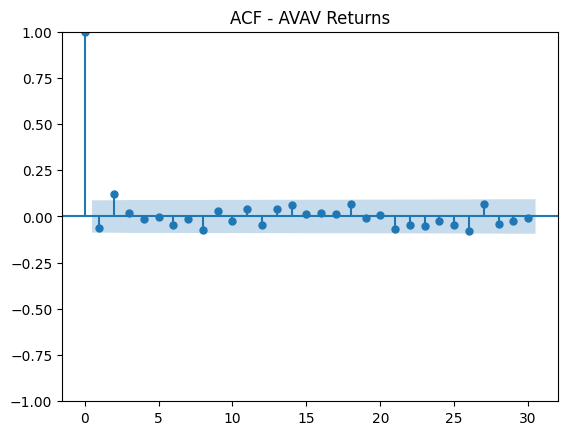

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


ticker = 'AVAV'
start_date = '2021-01-01'
end_date = '2023-01-01'
data = yf.download(ticker, start=start_date, end=end_date)


closing_prices = data['Close']
returns = closing_prices.pct_change().dropna()

plot_acf(returns, lags=30)
plt.title('ACF - AVAV Returns')
plt.show()

[*********************100%%**********************]  1 of 1 completed


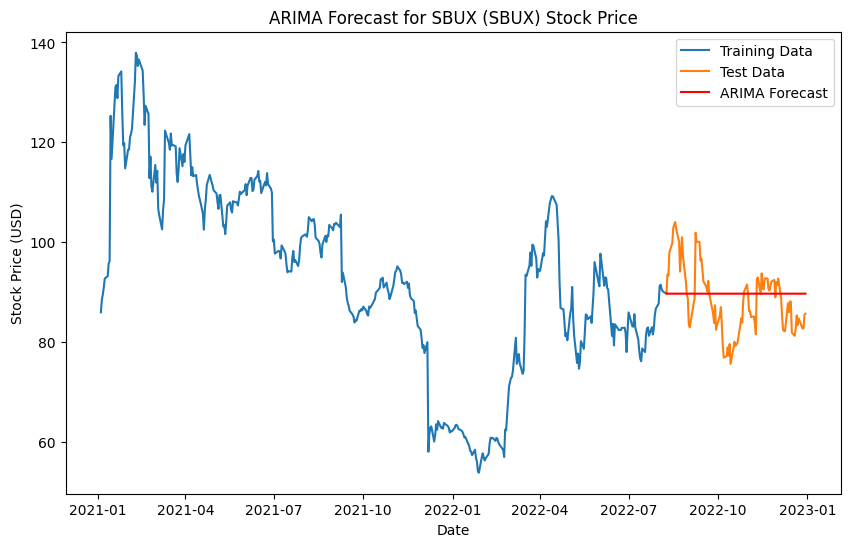

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

tickers = 'AVAV'
start = '2021-01-01'
end = '2024-03-24'

data = yf.download(tickers, start=start_date, end=end_date)
data = data.fillna(method='ffill').fillna(method='bfill')
closing_prices = data['Close']


train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

model = ARIMA(train, order= (2,1,0))
model_fit = model.fit()


forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for SBUX (SBUX) Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Adjusting stocks to ARIMA Starbucks showed the best stock price flow based on this model
# The plot shows the training data, the test data, and the forecasted stock prices for the 'SBUX' ticker using the ARIMA model
# This allows us to visually assess the performance of the ARIMA forecast against the actual test data
# Historical performance does not guarantee future results, so using the forecast for real-world investment decisions requires careful consideration and risk assessment.

[*********************100%%**********************]  1 of 1 completed


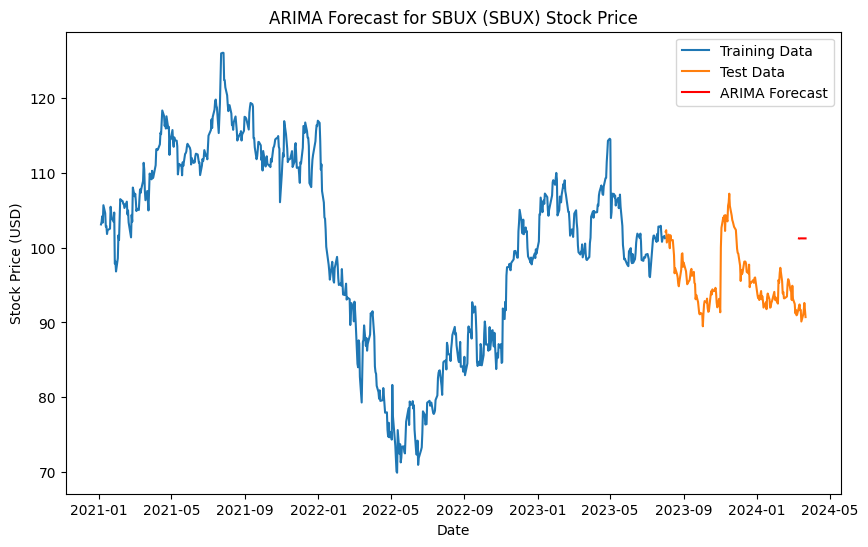

In [ ]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Define stock ticker and date range
tickers = 'SBUX'
start_date = '2021-01-01'
end_date = '2024-03-24'

# Download stock data and handle missing values
data = yf.download(tickers, start=start_date, end=end_date)
data = data.fillna(method='ffill').fillna(method='bfill')
closing_prices = data['Close']

# Split data into training and testing sets
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Define and fit ARIMA model with 10 forecast steps
model = ARIMA(train, order=(4, 1, 0))
model_fit = model.fit()
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual vs. forecast values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index[-forecast_steps:], forecast, label='ARIMA Forecast', color='red')  # Adjusted for forecast steps
plt.title('ARIMA Forecast for SBUX (SBUX) Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()



[*********************100%%**********************]  1 of 1 completed


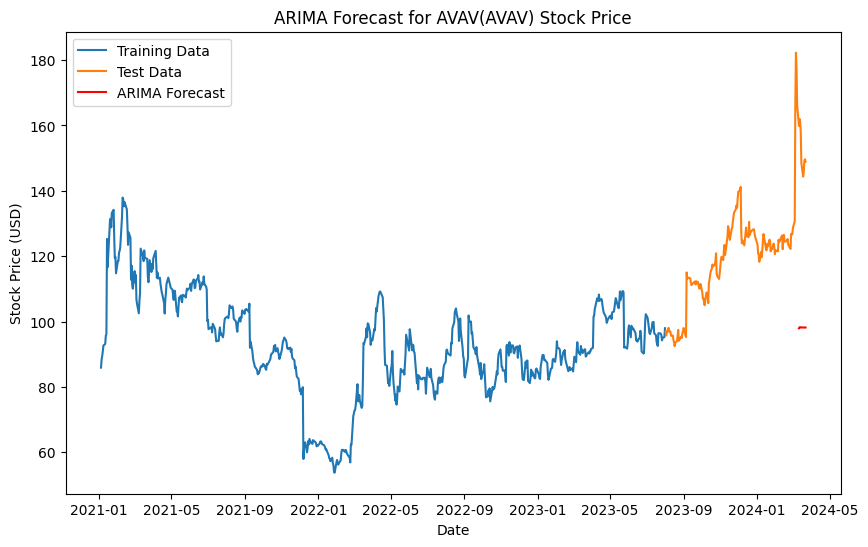

In [ ]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Define stock ticker and date range
tickers = 'AVAV'
start_date = '2021-01-01'
end_date = '2024-03-24'

# Download stock data and handle missing values
data = yf.download(tickers, start=start_date, end=end_date)
data = data.fillna(method='ffill').fillna(method='bfill')
closing_prices = data['Close']

# Split data into training and testing sets
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Define and fit ARIMA model with 10 forecast steps
model = ARIMA(train, order=(4, 1, 0))
model_fit = model.fit()
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual vs. forecast values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index[-forecast_steps:], forecast, label='ARIMA Forecast', color='red')  # Adjusted for forecast steps
plt.title('ARIMA Forecast for AVAV(AVAV) Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Disclaimer (already included in your code)

In [ ]:


from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
fore_cast_steps = len(test)
forecast = model_fit.forecast(steps = forecast_steps)

In [ ]:
def stock_price_simulation():

    mu = closing_prices.pct_change().mean()
    std =  closing_prices.pct_change().std()
    S0 = closing_prices.iloc[-1]
    T = 1
    N= 1000
    dt = T/N
    time_steps = T/dt
    iterations = 500
    t = np.linspace(0, N*dt, N+1)
    plt.figure(figsize=(10, 6))
    for j in range(iterations):
        price_path = [S0]
        St = S0
        for i in range(int(time_steps)):
            St = St * np.exp((mu - 0.5*std**2)*dt + std*np.sqrt(dt)*np.random.normal(0,1))
            price_path.append(St)
        plt.plot(t, price_path)
    plt.xlabel('Time Steps')
    plt.ylabel('Simulated Stock Price')
    plt.show()

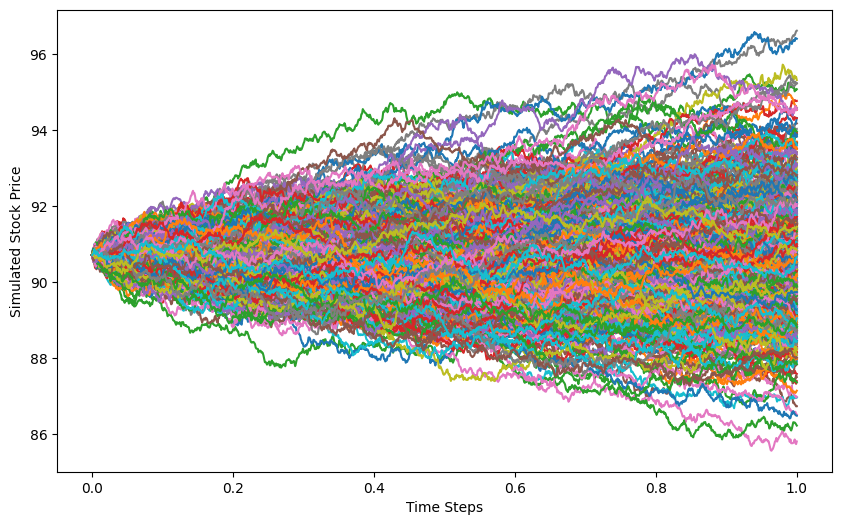

In [ ]:
stock_price_simulation()